## Problem 1

Execute in lazy mode:

In [1]:
import tensorflow as tf

x = tf.constant(list(range(100,110)))
y = tf.constant([34,28,45,67,89,93,24,49,11,7])
z = x + y

with tf.Session() as sess:
    print(sess.run(z))

[134 129 147 170 193 198 130 156 119 116]


In [ ]:
# Restart the kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

Execute in eager mode:

In [1]:
import tensorflow as tf

from tensorflow.contrib.eager.python import tfe
tfe.enable_eager_execution()

x = tf.constant(list(range(100,110)))
y = tf.constant([34,28,45,67,89,93,24,49,11,7])
print(x + y)

tf.Tensor([134 129 147 170 193 198 130 156 119 116], shape=(10,), dtype=int32)


## Problem 2

In [ ]:
# Restart the kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
import tensorflow as tf

x1 = tf.constant([[1,2,3,4],[5,6,7,8]])
x2 = tf.stack([x1,x1,x1,x1])
print("Original tensor:",x1)
print("New tensor:",x2)

Original tensor: Tensor("Const:0", shape=(2, 4), dtype=int32)
New tensor: Tensor("stack:0", shape=(4, 2, 4), dtype=int32)


## Problem 3

In [2]:
import tensorflow as tf

x1 = tf.constant([[1,2,3,4],[5,6,7,8]])
x2 = tf.reshape(x1,[1,2,4])
print("Original tensor:",x1)
print("New tensor:",x2)

Original tensor: Tensor("Const_1:0", shape=(2, 4), dtype=int32)
New tensor: Tensor("Reshape:0", shape=(1, 2, 4), dtype=int32)


## Problem 4

In [3]:
import tensorflow as tf

x1 = tf.constant([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
x2 = tf.reshape(x1,[6,2])
print("Original tensor:",x1)
print("New tensor:",x2)
print()

with tf.Session() as sess:
    print("The value of the new tensor:\n",x2.eval())

Original tensor: Tensor("Const_2:0", shape=(3, 4), dtype=int32)
New tensor: Tensor("Reshape_1:0", shape=(6, 2), dtype=int32)

The value of the new tensor:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


## Problem 5

In [4]:
import tensorflow as tf

a = tf.constant(1.12)
b = tf.constant(2.34)
c = tf.constant(0.72)
d = tf.constant(0.81)
f = tf.constant(19.83)

x = 1+a/b+c/tf.square(f)
s = (b-a)/(d-c)
r = 1/(1/a+1/b+1/c+1/d)
y = a*b*(1/c)*(tf.square(f)/2)

with tf.Session() as sess:
    r1,r2,r3,r4 = sess.run([x,s,r,y])
    print(r1)
    print(r2)
    print(r3)
    print(r4)

1.4804634
13.555558
0.25357127
715.6765


## Problem 6

In [ ]:
# Restart the kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
import tensorflow as tf

a = tf.constant(1.12,name="a")
b = tf.constant(2.34,name="b")
c = tf.constant(0.72,name="c")
d = tf.constant(0.81,name="d")
f = tf.constant(19.83,name="f")

x = 1+a/b+c/tf.square(f)
s = (b-a)/(d-c)
r = 1/(1/a+1/b+1/c+1/d)
y = a*b*(1/c)*(tf.square(f)/2)

with tf.Session() as sess:
    with tf.summary.FileWriter("summaries",sess.graph) as writer:
        r1,r2,r3,r4 = sess.run([x,s,r,y])

In [2]:
!tensorboard --logdir=./summaries --port 6066

TensorBoard 1.12.2 at http://dhcp-10-8-013-161.mobile.reshsg.uci.edu:6066 (Press CTRL+C to quit)
^C


The 4 DAGs are as follows:

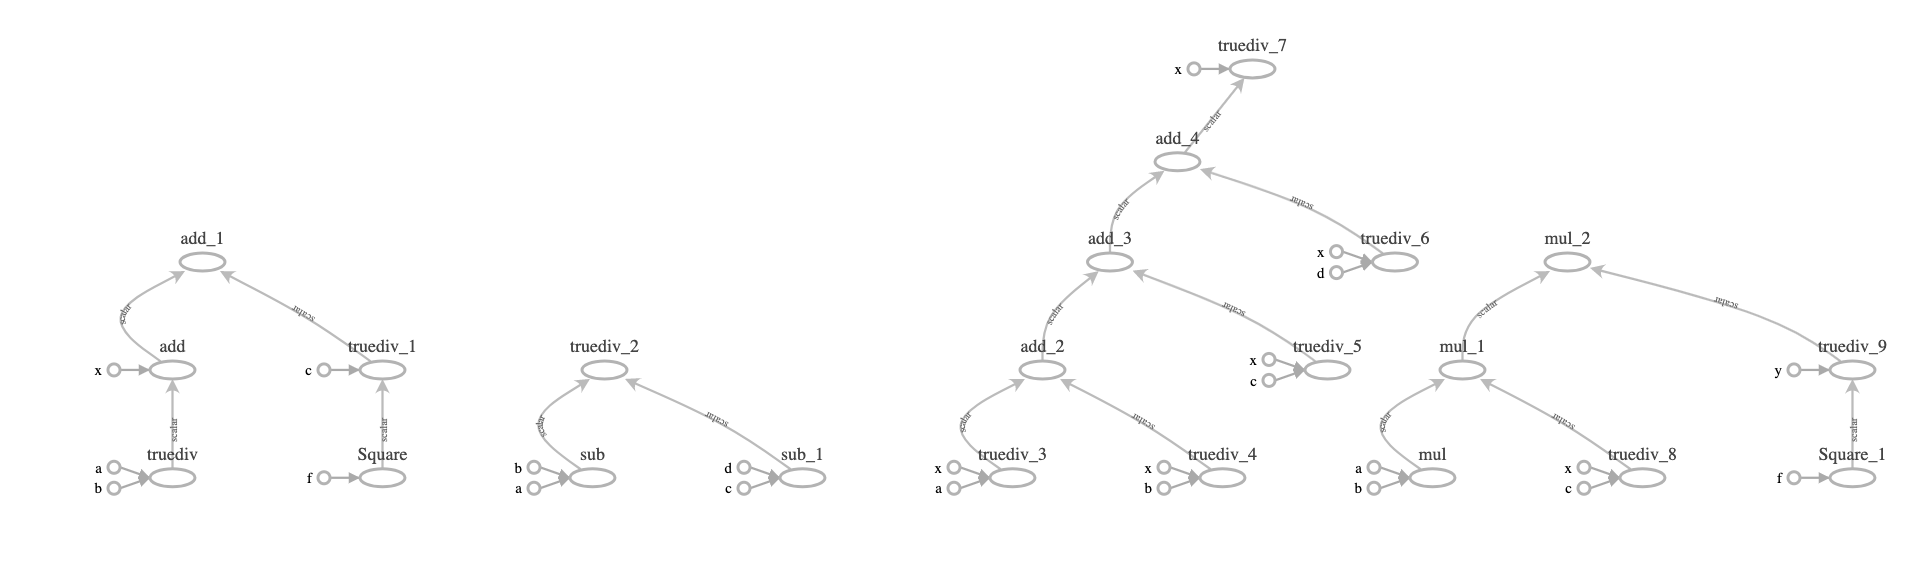

In [3]:
from IPython.display import Image
Image(filename='graph_run=.png')

## Problem 7

The code and results are shown as follows. Since the left hand side and right hand side of equation a has the same value, the associative property holds; Similarly, Since the left hand side and right hand side of equation b has the same value, the distributive property holds.

In [4]:
import tensorflow as tf

A = tf.constant([[4,-2,1],[6,8,-5],[7,9,10]])
B = tf.constant([[6,9,-4],[7,5,3],[-8,2,1]])
C = tf.constant([[-4,-5,2],[10,6,1],[3,-9,8]])

a_left = tf.matmul(A,B+C)
a_right = tf.matmul(A,B)+tf.matmul(A,C)

b_left = tf.matmul(tf.matmul(A,B),C)
b_right = tf.matmul(A,tf.matmul(B,C))

with tf.Session() as sess:
    print('Left hand side of a is:\n',sess.run(a_left))
    print('Right hand side of a is:\n',sess.run(a_right))
    print()
    print('Left hand side of b is:\n',sess.run(b_left))
    print('Right hand side of b is:\n',sess.run(b_right))

Left hand side of a is:
 [[-31 -13  -7]
 [173 147 -25]
 [117  57 112]]
Right hand side of a is:
 [[-31 -13  -7]
 [173 147 -25]
 [117  57 112]]

Left hand side of b is:
 [[ 209  347 -136]
 [ 297 -111  308]
 [1207  562  250]]
Right hand side of b is:
 [[ 209  347 -136]
 [ 297 -111  308]
 [1207  562  250]]
